# Lab 6 Histogram Equalization

### Abdul Samad
### BSCS-9C

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def cal_intensity_values(img):
    img_arr = np.asarray(img).copy()
    intensity_vals = np.zeros(256)
    
    for pixel in np.nditer(img_arr):
        intensity_vals[pixel] = intensity_vals[pixel] +1
    return intensity_vals



def plot_bargraph(intensity_arr, bins):
    plt.bar(range(bins),intensity_arr)
    # The following commands add labels to our figure.
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of intensity values')
    plt.show()
    

### Reading an Image

In [3]:
image = Image.open("image_lab6.tif").convert("L")
img_arr = np.asarray(image, dtype=np.uint8)

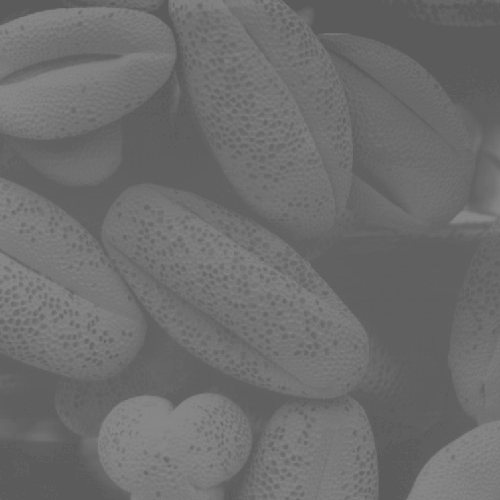

In [4]:
image

### Apply Histogram Equalization technique using formula

In [5]:
intensity_vals = cal_intensity_values(image) # Calculate intensity frequency of given image
normalized_arr = intensity_vals / img_arr.size # Normalize by diving intensity frequency with image size
cdf = np.cumsum(normalized_arr) # calculate cumulative distribution function 
transformed_arr = np.round(cdf * 255 ) # Calculate Transformed array


sk = intensity_vals.copy()
for i in range(256):
    indices = np.where(transformed_arr == i)
    sk[i] = intensity_vals[indices].sum()

### Histogram before equalization

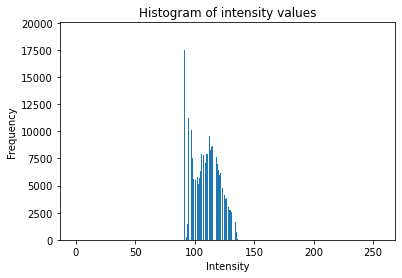

In [6]:
plot_bargraph(intensity_vals, 256)

### Histogram after equalization

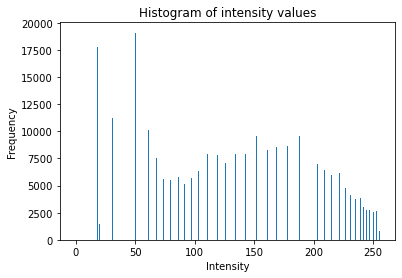

In [7]:
plot_bargraph(sk, 256)

In [8]:
# intensity_vals
# cdf
# transformed_arr
# sk